In [ ]:
# ! pip install tensorflow
# ! pip install xgboost
# ! pip install lightgbm

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [2]:
tourlist=pd.read_excel('dataset_clean.xlsx')
tourlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205381 entries, 0 to 205380
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   관광지명       205381 non-null  object        
 1   검색건수       205381 non-null  int64         
 2   area_code  205381 non-null  int64         
 3   date       205381 non-null  object        
 4   avgTemp    205381 non-null  float64       
 5   highTemp   205381 non-null  float64       
 6   lowTemp    205381 non-null  float64       
 7   weather    205381 non-null  int64         
 8   rainProb   205381 non-null  int64         
 9   datetime   205381 non-null  datetime64[ns]
 10  month      205381 non-null  object        
 11  weekday    205381 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 18.8+ MB


In [3]:
#범주형 데이터 원핫인코딩
tourlist_oh = pd.get_dummies(tourlist['관광지명'])
weather_oh = pd.get_dummies(tourlist['weather'])

In [4]:
# pca
from sklearn.decomposition import PCA
# 관광지명, 날씨, 평균온도, 최고온도, 최저온도, 강수확률
train = pd.concat([tourlist_oh, weather_oh, tourlist[['avgTemp','highTemp','lowTemp','rainProb']]], axis=1)
target = tourlist['검색건수']

pca = PCA(n_components=20)
pca.fit(train)

C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


PCA(n_components=20)

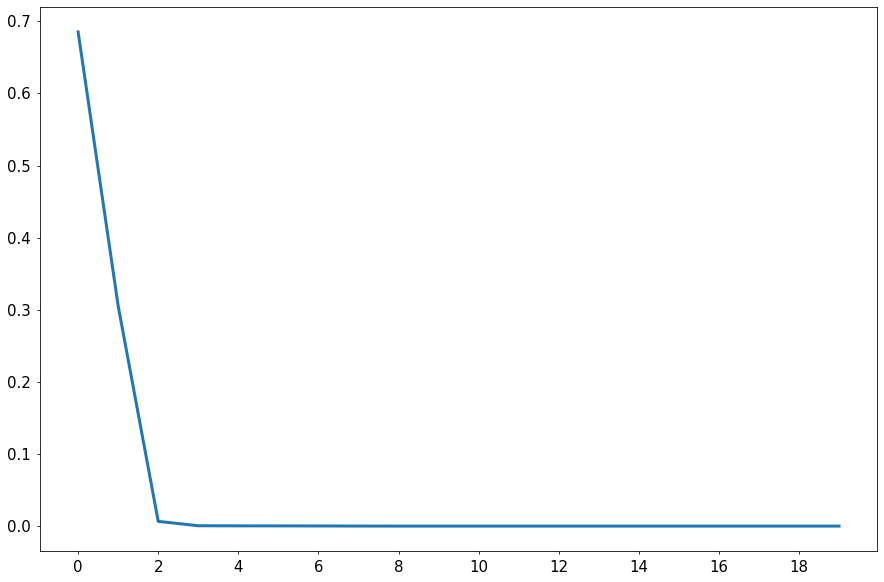

In [26]:
# pca주성분갯수
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(pca.explained_variance_ratio_, linewidth = "3")
plt.xticks(np.arange(0,20,2))
plt.tick_params(axis='x', length=3, pad=6, labelsize=15)
plt.tick_params(axis='y', length=3, pad=6, labelsize=15)
plt.show()

In [6]:
pca = PCA()
pca.fit(train)

C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


PCA()

In [ ]:
# pca>> n_components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

train_score = []
test_score = []

for i in range(1,21):
    pca = PCA(n_components=i)
    pca.fit(train)
    train_pca = pca.transform(train)
    train_input,test_input,train_target,test_target = train_test_split(
    train_pca,target, test_size = 0.3)
    model = XGBRegressor(tree_method = 'hist')
    model.fit(train_input,train_target)
    train_score.append(model.score(train_input, train_target))
    test_score.append(model.score(test_input, test_target))


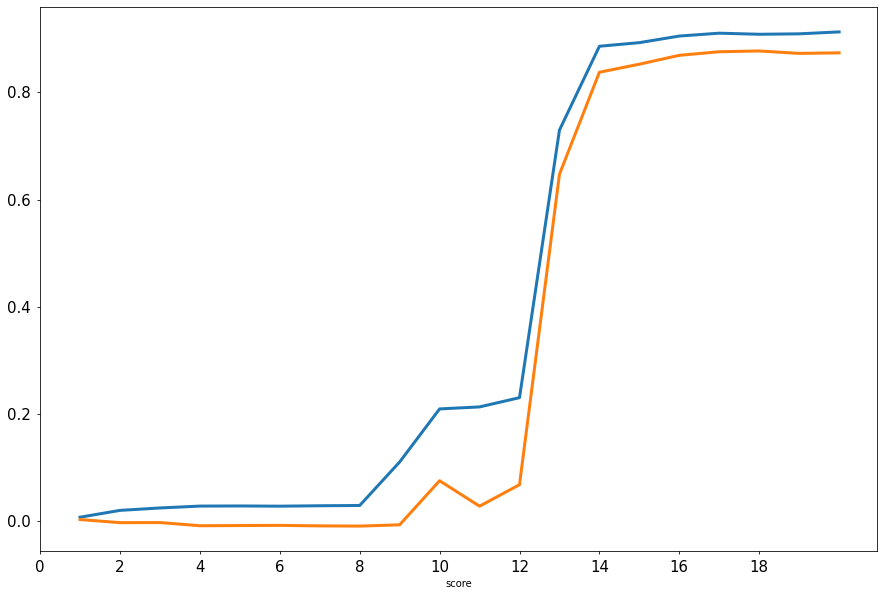

In [24]:
plt.figure(figsize=(15,10))
plt.plot(range(1,21), train_score, linewidth="3")
plt.plot(range(1,21), test_score, linewidth="3")
plt.xlabel('n_component')
plt.xlabel('score')
plt.xticks(np.arange(0,20,2))
plt.tick_params(axis='x', length=3, pad=6, labelsize=15)
plt.tick_params(axis='y', length=3, pad=6, labelsize=15)
plt.show()